In [520]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [521]:
df = pd.read_csv('imdb.csv')

print("\nInformazioni generali Data Frame IMDB\n\n")

display(df.info())


Informazioni generali Data Frame IMDB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432295 entries, 0 to 432294
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    432295 non-null  int64  
 1   title                 432295 non-null  object 
 2   vote_average          432295 non-null  float64
 3   vote_count            432295 non-null  int64  
 4   status                432295 non-null  object 
 5   release_date          414562 non-null  object 
 6   revenue               432295 non-null  int64  
 7   runtime               432295 non-null  int64  
 8   adult                 432295 non-null  bool   
 9   backdrop_path         183573 non-null  object 
 10  budget                432295 non-null  int64  
 11  homepage              54111 non-null   object 
 12  tconst                432295 non-null  object 
 13  original_language     432295 non-null  object 
 14  original_ti

None

In [522]:
#Verifichiamo più chiaramente quanti elementi nulli ci sono per ogni colonna
df.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date             17733
revenue                      0
runtime                      0
adult                        0
backdrop_path           248722
budget                       0
homepage                378184
tconst                       0
original_language            0
original_title               0
overview                 41057
popularity                   0
poster_path              73969
tagline                 341365
genres                   76873
production_companies    170168
production_countries    110756
spoken_languages        100832
keywords                261594
directors                10355
writers                  67081
averageRating                0
numVotes                     0
dtype: int64

In [523]:
#E controlliamo quanti elementi unici ci siano.
for column in df:
    print(column,"---", df[column].nunique() ,"elementi unici.")

id --- 432185 elementi unici.
title --- 373346 elementi unici.
vote_average --- 4996 elementi unici.
vote_count --- 3598 elementi unici.
status --- 6 elementi unici.
release_date --- 39509 elementi unici.
revenue --- 13543 elementi unici.
runtime --- 553 elementi unici.
adult --- 2 elementi unici.
backdrop_path --- 183290 elementi unici.
budget --- 4014 elementi unici.
homepage --- 52836 elementi unici.
tconst --- 431446 elementi unici.
original_language --- 158 elementi unici.
original_title --- 391936 elementi unici.
overview --- 388991 elementi unici.
popularity --- 19439 elementi unici.
poster_path --- 357492 elementi unici.
tagline --- 89481 elementi unici.
genres --- 10493 elementi unici.
production_companies --- 135934 elementi unici.
production_countries --- 8294 elementi unici.
spoken_languages --- 5937 elementi unici.
keywords --- 113884 elementi unici.
directors --- 160255 elementi unici.
writers --- 260537 elementi unici.
averageRating --- 91 elementi unici.
numVotes --- 19

In [524]:
#Riempiamo i valori nulli in maniera "utile". La colonna release_date è la più problematica:
colonne_na_testo = ["production_companies", "production_countries", "spoken_languages", "directors", "writers"]
for colonna in colonne_na_testo:
    df[colonna].fillna("ignoto", inplace = True)

df["genres"].fillna("ignoto,", inplace = True)

df["keywords"].fillna("", inplace = True)

df["release_date"].fillna(pd.to_datetime('1888-10-14'), inplace = True)

df['main_genere'] = df['genres'].str.split(',').str[0]

df['production_companies'] = df['production_companies'].str.split(',').str[0]

df['production_countries'] = df['production_countries'].str.split(',').str[0]





C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\3251964061.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colonna].fillna("ignoto", inplace = True)
C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\3251964061.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [525]:
#Droppiamo colonne poco utili contenenti testo e link 
df = df.drop(["id","backdrop_path","poster_path", "homepage", "tconst","overview", "tagline"], axis = 1)

#Vediamo come si presenta il dataframe dopo il drop
df.head()


,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,main_genere
0,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,...,"Action, Science Fiction, Adventure",Legendary Pictures,United Kingdom,"English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2615046,Action
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,...,"Adventure, Drama, Science Fiction",Legendary Pictures,United Kingdom,English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2200215,Adventure
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,...,"Drama, Action, Crime, Thriller",DC Comics,United Kingdom,"English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2946971,Drama
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,...,"Action, Adventure, Fantasy, Science Fiction",Dune Entertainment,United States of America,"English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1409099,Action
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1483869,Science Fiction


In [526]:
#Parametri per la formula del weighted vote
C = df["vote_average"].mean()
m = df["vote_count"].quantile(0.8)

def weighted_rating(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    return (v / (v + m) * R) + (m / (v + m) * C)

#Aggiungere colonna per il weighted vote
df["weighted_vote"] = df.apply(weighted_rating, axis=1)

In [527]:
#Andiamo a rendere le colonne di testo (che contengono un'unica stringa con le parole separate da virgole) dei set contententi le singole parole

colonne_testo = ["genres", "production_companies","production_countries","spoken_languages","keywords","writers",]
for colonna in colonne_testo:
    df[colonna] = df[colonna].apply(lambda x: x.split(','))

In [528]:
#Rendiamo numerica la colonna "adult":
df["adult"].replace("False", 0, inplace = True)
df["adult"].replace("True", 1, inplace = True)



C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\2785487494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["adult"].replace("False", 0, inplace = True)
C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\2785487494.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [529]:
data_voti = df[["vote_average" ,"vote_count","popularity","averageRating","numVotes"]]

Text(0.5, 1.0, 'Heatmap for vote_average - averageRating')

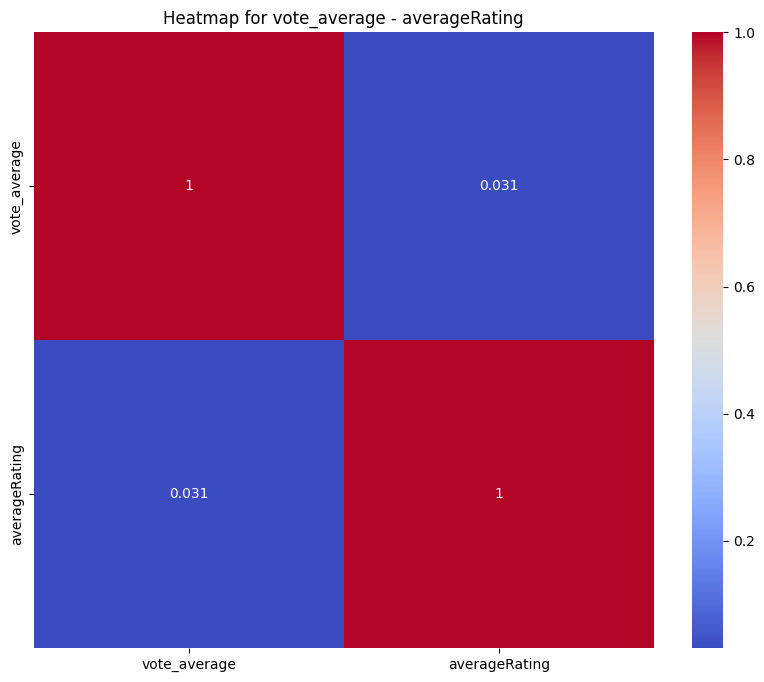

In [530]:
#Immagino che le colonne vote_average e averageRating siano fortemente correlate al punto da poterne droppare una, ma la heatmap ci dice che non è così
corr_matrix = df[["vote_average","averageRating"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Heatmap for vote_average - averageRating')

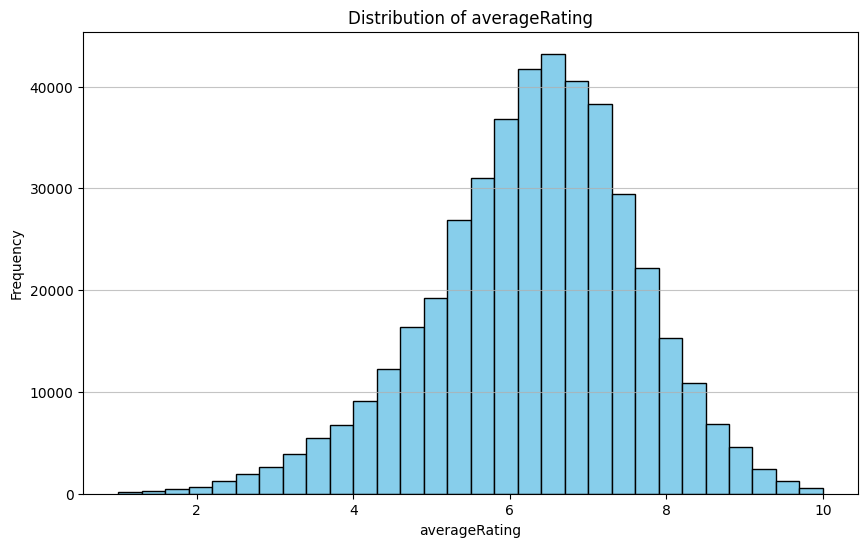

In [531]:
#Vediamo un pò di medie:
plt.figure(figsize=(10, 6))
plt.hist(df['averageRating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of averageRating')
plt.xlabel('averageRating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

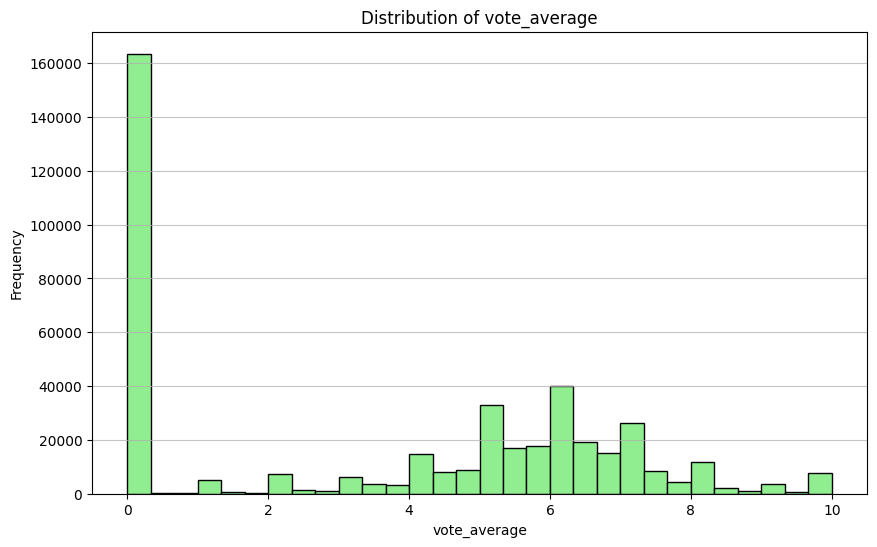

In [532]:
plt.figure(figsize=(10, 6))
plt.hist(df['vote_average'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of vote_average')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

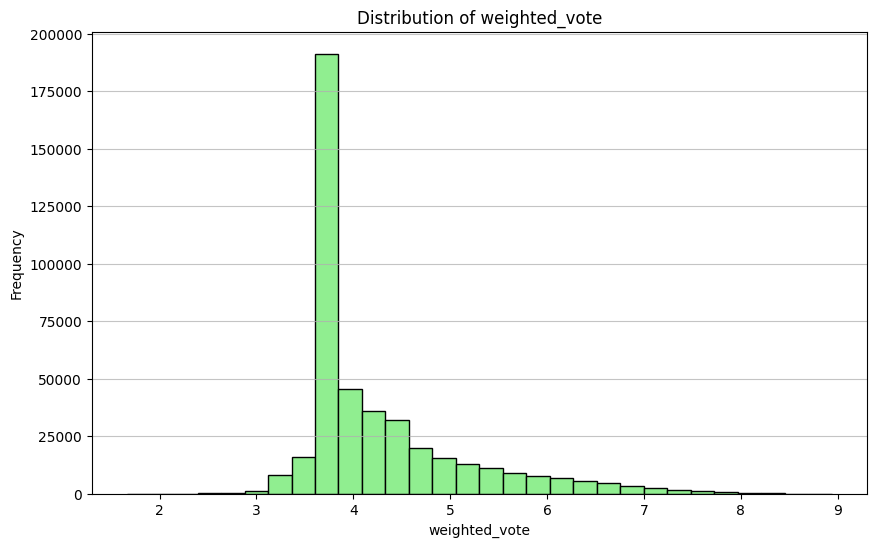

In [533]:
plt.figure(figsize=(10, 6))
plt.hist(df['weighted_vote'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of weighted_vote')
plt.xlabel('weighted_vote')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

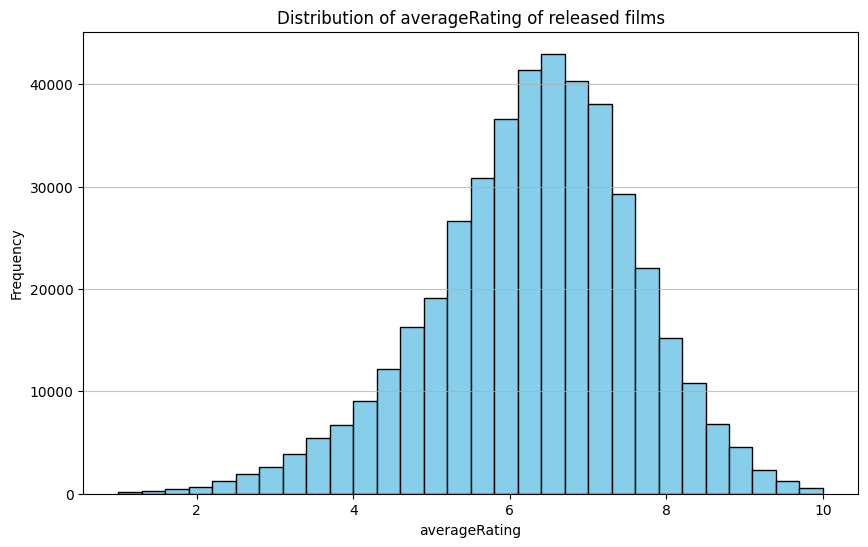

In [534]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["status"] == "Released"]['averageRating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of averageRating of released films')
plt.xlabel('averageRating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

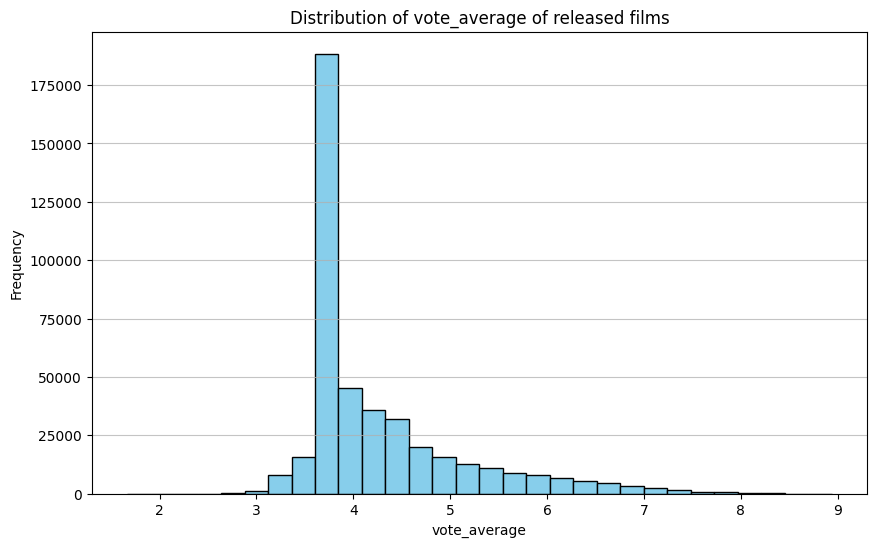

In [535]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["status"] == "Released"]['weighted_vote'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of vote_average of released films')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

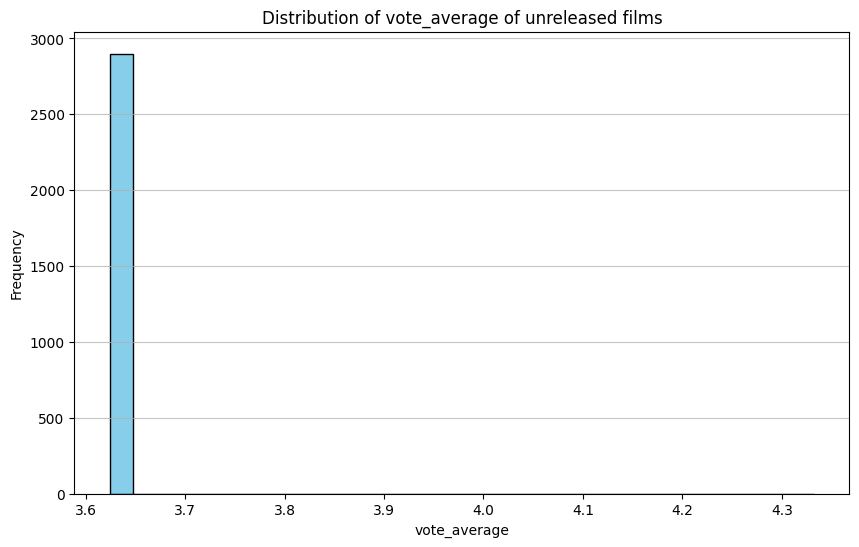

In [536]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["status"] != "Released"]['weighted_vote'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of vote_average of unreleased films')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

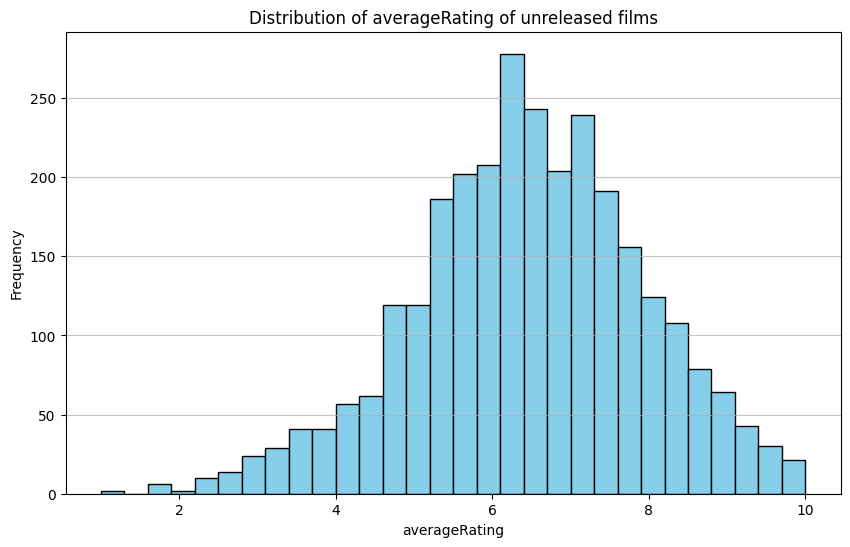

In [537]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["status"] != "Released"]['averageRating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of averageRating of unreleased films')
plt.xlabel('averageRating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

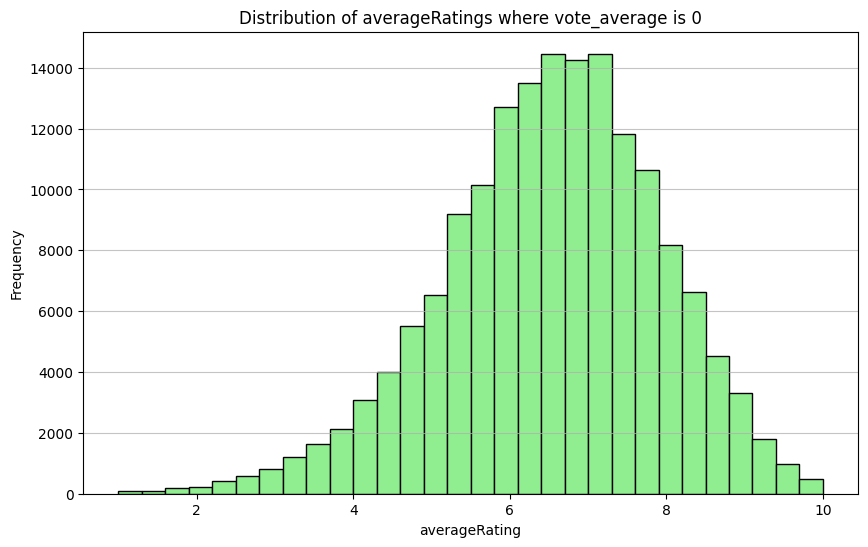

count    163519.000000
mean          6.473280
std           1.388524
min           1.000000
25%           5.600000
50%           6.600000
75%           7.400000
max          10.000000
Name: averageRating, dtype: float64

In [538]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["vote_average"] == 0]["averageRating"], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of averageRatings where vote_average is 0')
plt.xlabel('averageRating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

df[(df["vote_average"] == 0) & (df["status"] == "Released")]["averageRating"]

df[df["vote_average"] == 0]["averageRating"].describe()



In base ai grafici sopra decido di lasciare solo la colonna weighted_vote

In [539]:
df.columns

Index(['title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'original_language',
       'original_title', 'popularity', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords', 'directors',
       'writers', 'averageRating', 'numVotes', 'main_genere', 'weighted_vote'],
      dtype='object')

In [540]:
df.drop(["averageRating", "vote_average"], axis=1, inplace = True)

In [541]:
df.columns

Index(['title', 'vote_count', 'status', 'release_date', 'revenue', 'runtime',
       'adult', 'budget', 'original_language', 'original_title', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords', 'directors', 'writers', 'numVotes',
       'main_genere', 'weighted_vote'],
      dtype='object')

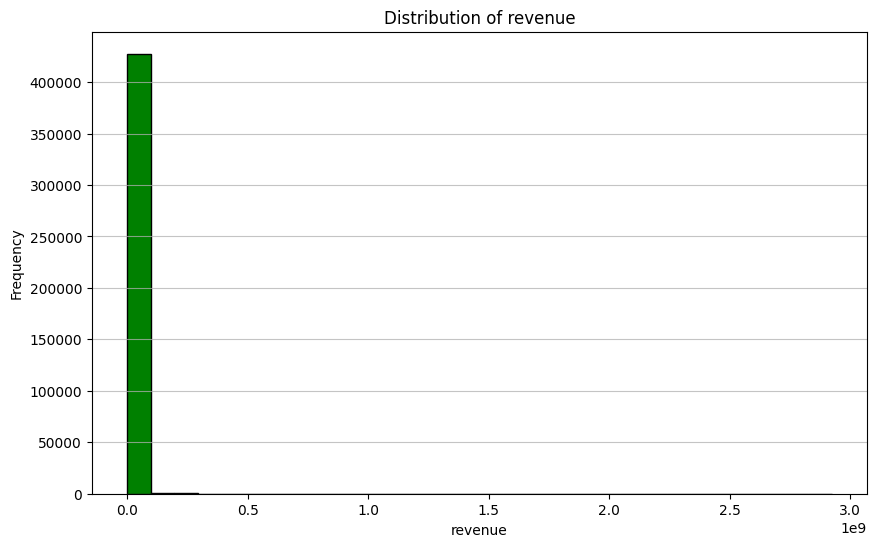

In [542]:
# for column in ['vote_count', 'status', 'release_date',
#        'revenue', 'runtime', 'adult', 'budget', 'original_language', 'popularity', 'genres', 'production_companies',
#        'production_countries', 'numVotes']:
column = "revenue"
plt.figure(figsize=(10, 6))
plt.hist(df[df["status"] == "Released"][column], bins=30, color='green', edgecolor='black')
plt.title(f'Distribution of {column}')
plt.xlabel(f'{column}')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [543]:
zero_count = (df[df["status"] == "Released" ]["revenue"] == 0).sum()
print(f"Number of zeros in the column: {zero_count}")

Number of zeros in the column: 413212


In [544]:
df[df["status"] == "Released" ]["revenue"].mean()

np.float64(1660000.284224475)

In [545]:
df["status"].unique()

array(['Released', 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

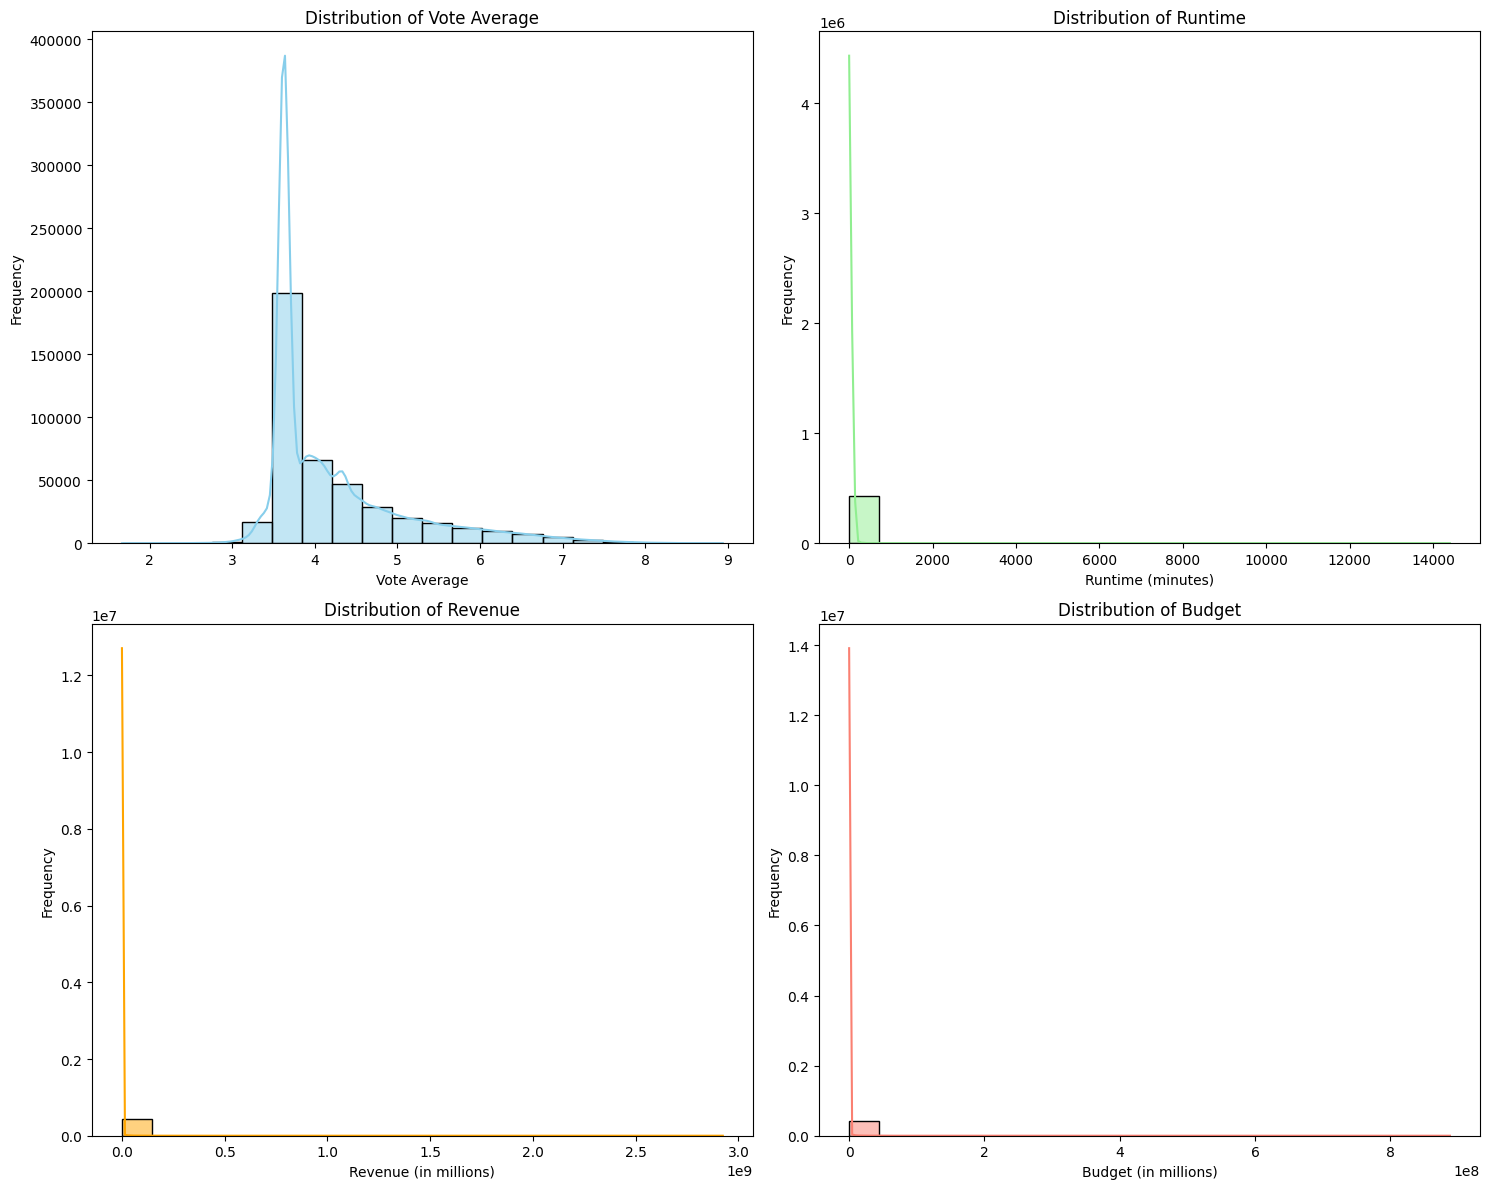

In [546]:
plt.figure(figsize=(15, 12))

# Plot 1: Distribution of vote_average
plt.subplot(2, 2, 1)  # (rows, cols, index)
sns.histplot(df['weighted_vote'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')

# Plot 2: Distribution of runtime
plt.subplot(2, 2, 2)
sns.histplot(df['runtime'].dropna(), kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# Plot 3: Distribution of revenue
plt.subplot(2, 2, 3)
sns.histplot(df['revenue'].dropna(), kde=True, bins=20, color='orange')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in millions)')
plt.ylabel('Frequency')

# Plot 4: Distribution of budget
plt.subplot(2, 2, 4)
sns.histplot(df['budget'].dropna(), kde=True, bins=20, color='salmon')
plt.title('Distribution of Budget')
plt.xlabel('Budget (in millions)')
plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

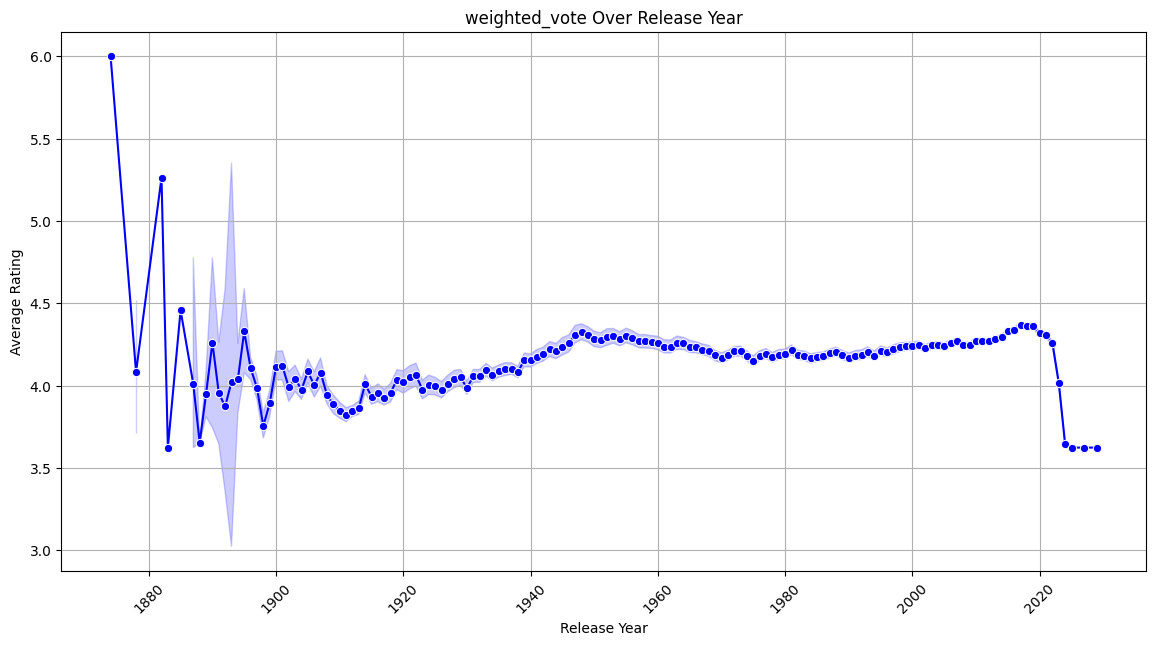

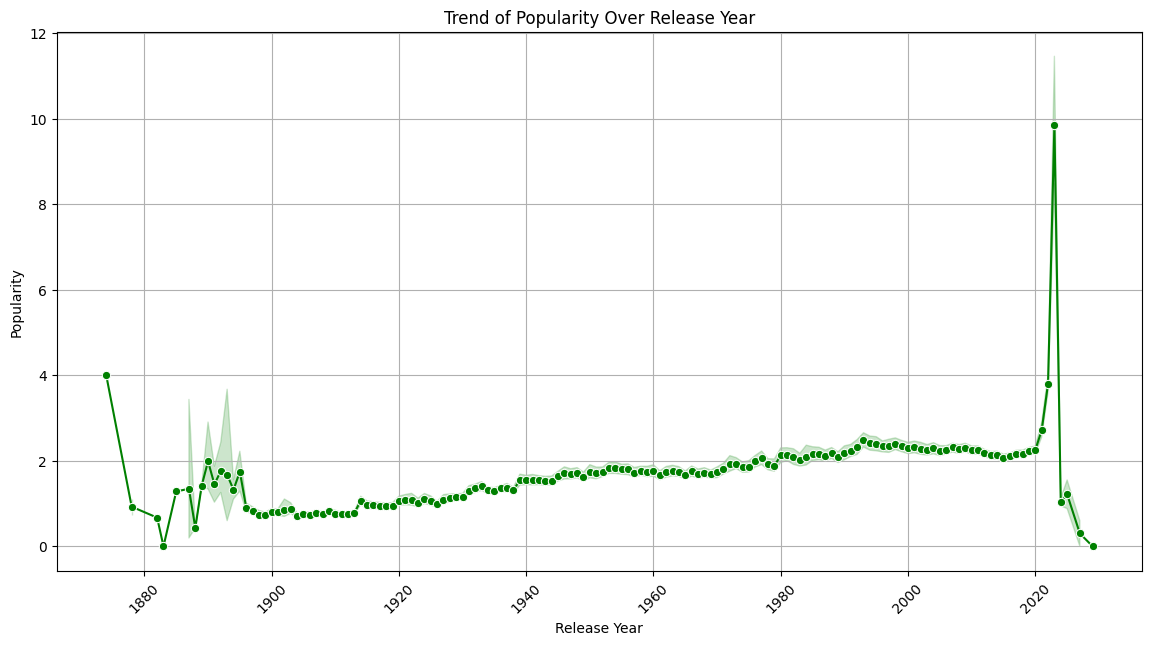

In [547]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


#Controlliamo solo l'anno
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='release_year', y='weighted_vote', marker='o', color='blue')
plt.title('weighted_vote Over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot: Trend of popularity over release_date
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='release_year', y='popularity', marker='o', color='green')
plt.title('Trend of Popularity Over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [548]:
df.columns

Index(['title', 'vote_count', 'status', 'release_date', 'revenue', 'runtime',
       'adult', 'budget', 'original_language', 'original_title', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords', 'directors', 'writers', 'numVotes',
       'main_genere', 'weighted_vote', 'release_year'],
      dtype='object')

In [549]:
#Proviamo a modificare la funzione di ieri:

def analyze_and_plot_fixed(dataframe, group_col, base_path):
    # Lista per DataFrame filtrati e correlazioni
    filtered_corr_list = []
    
    # Valori unici della colonna
    unique_values = dataframe[group_col].unique()
    
    for value in unique_values:
        # Filtra il DataFrame
        df_filtered = dataframe[dataframe[group_col] == value]
        
        if df_filtered.empty:
            continue  # Salta se il DataFrame è vuoto
        
        # Nome del gruppo
        group_name = str(df_filtered[group_col].iloc[0]).replace("/", "-")  # Gestione di caratteri speciali
        
        # Rimuovi le colonne non necessarie
        df_cleaned = df_filtered.drop(['title', 'status', 'original_language',
       'original_title', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords', 'directors',
       'writers', 'averageRating','release_year',"main_genere"], axis=1, errors='ignore')
        
        # Calcola la matrice di correlazione
        corr_matrix = df_cleaned.corr()
        
        # Filtra correlazioni significative
        filtered = corr_matrix.where(((corr_matrix > 0.3) | (corr_matrix < -0.3)) & (corr_matrix != 1)).stack()
        filtered_corr_list.append((f'{group_col} name: {group_name}\n', filtered))
        
        # Crea la directory per salvare le immagini
        save_path = os.path.join(base_path, group_col)
        os.makedirs(save_path, exist_ok=True)
        
        # Plotta la heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {group_col}: {group_name}')
        
        # Salva il grafico
        plt.savefig(f'{save_path}/{group_name}_heatmap.png', bbox_inches='tight')
        plt.close()  # Chiudi il grafico per evitare conflitti
        
    return filtered_corr_list


base_path = './image'
filtered_corr_status = analyze_and_plot_fixed(df, 'status', base_path)
filtered_corr_adult = analyze_and_plot_fixed(df, 'adult', base_path)


In [550]:
# Visualizza i risultati
display(filtered_corr_status)
print("\n\n---------------------\n\n")
display(filtered_corr_adult)


[('status name: Released\n',
  vote_count  revenue       0.776400
              budget        0.654949
              numVotes      0.924303
  revenue     vote_count    0.776400
              budget        0.744690
              numVotes      0.667031
  budget      vote_count    0.654949
              revenue       0.744690
              numVotes      0.559042
  numVotes    vote_count    0.924303
              revenue       0.667031
              budget        0.559042
  dtype: float64),
 ('status name: Rumored\n',
  vote_count     numVotes         0.738328
                 weighted_vote    1.000000
  runtime        numVotes        -0.464873
  popularity     numVotes         0.738328
                 weighted_vote    1.000000
  numVotes       vote_count       0.738328
                 runtime         -0.464873
                 popularity       0.738328
                 weighted_vote    0.738328
  weighted_vote  vote_count       1.000000
                 popularity       1.000000
       



---------------------




[('adult name: False\n',
  vote_count  revenue       0.776400
              budget        0.651461
              numVotes      0.922882
  revenue     vote_count    0.776400
              budget        0.740826
              numVotes      0.666001
  budget      vote_count    0.651461
              revenue       0.740826
              numVotes      0.556725
  numVotes    vote_count    0.922882
              revenue       0.666001
              budget        0.556725
  dtype: float64),
 ('adult name: True\n',
  vote_count     revenue          0.384046
                 popularity       0.464552
                 weighted_vote    0.523208
  release_date   runtime          0.386562
  revenue        vote_count       0.384046
  runtime        release_date     0.386562
  popularity     vote_count       0.464552
  weighted_vote  vote_count       0.523208
  dtype: float64)]

In [551]:
def corr_comuni(filtered_corr_list,nome_lista):

    correlation_dict = {}

    for group_info, filtered_corr in filtered_corr_list:
        group_name = group_info.strip()
        for (col1, col2), value in filtered_corr.items():
            pair = tuple(sorted([col1, col2]))
            correlation_dict.setdefault(pair, set()).add(group_name)

    #Filtra le coppie presenti in almeno 2 elementi unici della colonna
    relevant_correlations = {pair: names for pair, names in correlation_dict.items() if len(names) >= 2}

    #Stampa i risultati
    print(f"Correlazioni presenti in 2 o più {nome_lista}:")
    for pair, names in relevant_correlations.items():
        print(f"{pair}: presenti in {len(names)} {nome_lista} -> {', '.join(names)}")

    return relevant_correlations


relevant_correlations_status = corr_comuni(filtered_corr_status,"status")
print("\n\n---------------------\n\n")
relevant_correlations_adult = corr_comuni(filtered_corr_adult, "adult")

Correlazioni presenti in 2 o più status:
('numVotes', 'vote_count'): presenti in 2 status -> status name: Released, status name: Rumored
('budget', 'numVotes'): presenti in 2 status -> status name: Released, status name: Post Production
('vote_count', 'weighted_vote'): presenti in 2 status -> status name: Rumored, status name: Post Production
('numVotes', 'runtime'): presenti in 2 status -> status name: Canceled, status name: Rumored
('numVotes', 'popularity'): presenti in 4 status -> status name: Canceled, status name: Rumored, status name: In Production, status name: Post Production
('budget', 'popularity'): presenti in 2 status -> status name: Canceled, status name: Post Production
('release_date', 'runtime'): presenti in 2 status -> status name: Canceled, status name: In Production
('popularity', 'release_date'): presenti in 2 status -> status name: Canceled, status name: In Production


---------------------


Correlazioni presenti in 2 o più adult:
('revenue', 'vote_count'): pres

In [552]:
df.columns

Index(['title', 'vote_count', 'status', 'release_date', 'revenue', 'runtime',
       'adult', 'budget', 'original_language', 'original_title', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords', 'directors', 'writers', 'numVotes',
       'main_genere', 'weighted_vote', 'release_year'],
      dtype='object')

In [553]:
filtered_corr_genere = analyze_and_plot_fixed(df, 'main_genere', base_path)
print("\n\n---------------------\n\n")
display(filtered_corr_genere)
print("\n\n---------------------\n\n")
relevant_correlations_genere = corr_comuni(filtered_corr_genere,"genere")
print("\n\n---------------------\n\n")



---------------------




[('main_genere name: Action\n',
  vote_count     revenue          0.823487
                 budget           0.745069
                 numVotes         0.939195
                 weighted_vote    0.334838
  revenue        vote_count       0.823487
                 budget           0.790233
                 numVotes         0.737699
  budget         vote_count       0.745069
                 revenue          0.790233
                 numVotes         0.690573
                 weighted_vote    0.323122
  numVotes       vote_count       0.939195
                 revenue          0.737699
                 budget           0.690573
                 weighted_vote    0.330861
  weighted_vote  vote_count       0.334838
                 budget           0.323122
                 numVotes         0.330861
  dtype: float64),
 ('main_genere name: Adventure\n',
  vote_count     revenue          0.875127
                 budget           0.758303
                 popularity       0.609586
           



---------------------


Correlazioni presenti in 2 o più genere:
('revenue', 'vote_count'): presenti in 17 genere -> main_genere name: Thriller, main_genere name: Fantasy, main_genere name: Science Fiction, main_genere name: History, main_genere name: Mystery, main_genere name: Action, main_genere name: Adventure, main_genere name: Comedy, main_genere name: Horror, main_genere name: Western, main_genere name: War, main_genere name: Drama, main_genere name: Animation, main_genere name: Family, main_genere name: Music, main_genere name: Crime, main_genere name: Romance
('budget', 'vote_count'): presenti in 16 genere -> main_genere name: Thriller, main_genere name: Fantasy, main_genere name: Science Fiction, main_genere name: History, main_genere name: Action, main_genere name: Adventure, main_genere name: Comedy, main_genere name: Horror, main_genere name: Western, main_genere name: War, main_genere name: Drama, main_genere name: Animation, main_genere name: Family, main_genere name: M

In [554]:
df.groupby("main_genere")["revenue"].mean()

main_genere
Action             8.506516e+06
Adventure          1.451090e+07
Animation          2.695656e+06
Comedy             1.672979e+06
Crime              1.729432e+06
Documentary        4.716380e+04
Drama              9.617348e+05
Family             4.495680e+06
Fantasy            6.926620e+06
History            9.886003e+05
Horror             1.449992e+06
Music              6.165573e+05
Mystery            2.075058e+06
Romance            1.223345e+06
Science Fiction    6.118577e+06
TV Movie           1.209182e+04
Thriller           1.875129e+06
War                2.679261e+06
Western            4.848604e+05
ignoto             6.715628e+03
Name: revenue, dtype: float64

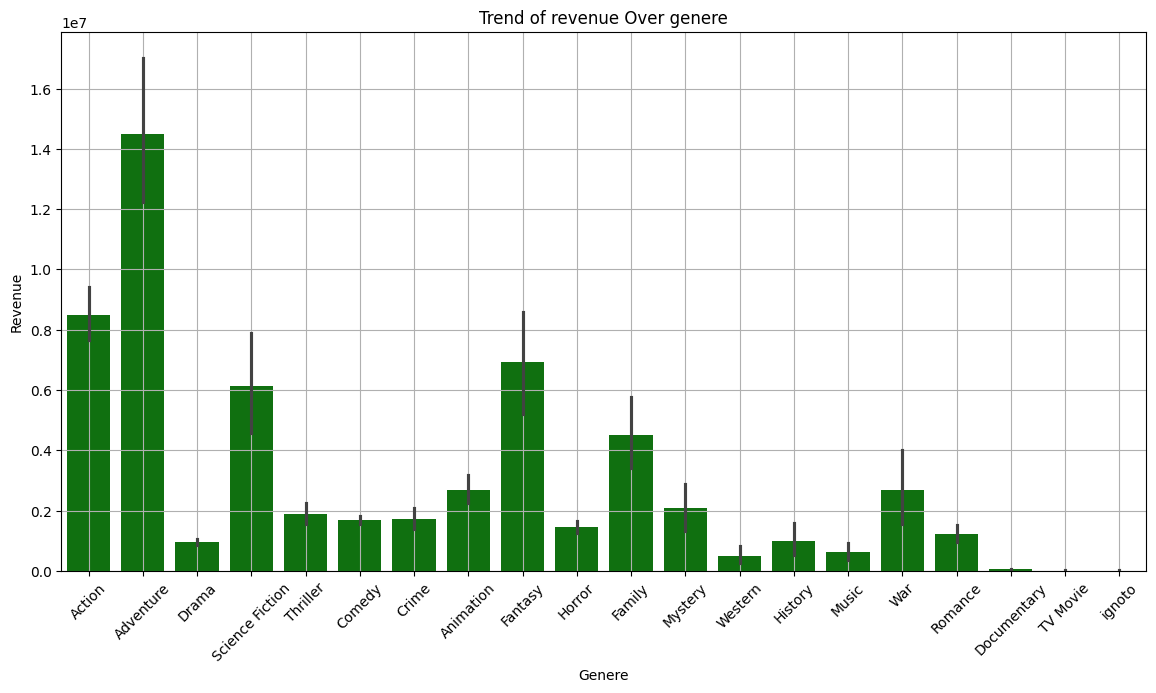

In [555]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='main_genere', y='revenue', color='green')
plt.title('Trend of revenue Over genere')
plt.xlabel('Genere')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\2596887907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_vote_avg, x='main_genere', y='weighted_vote', palette='muted')


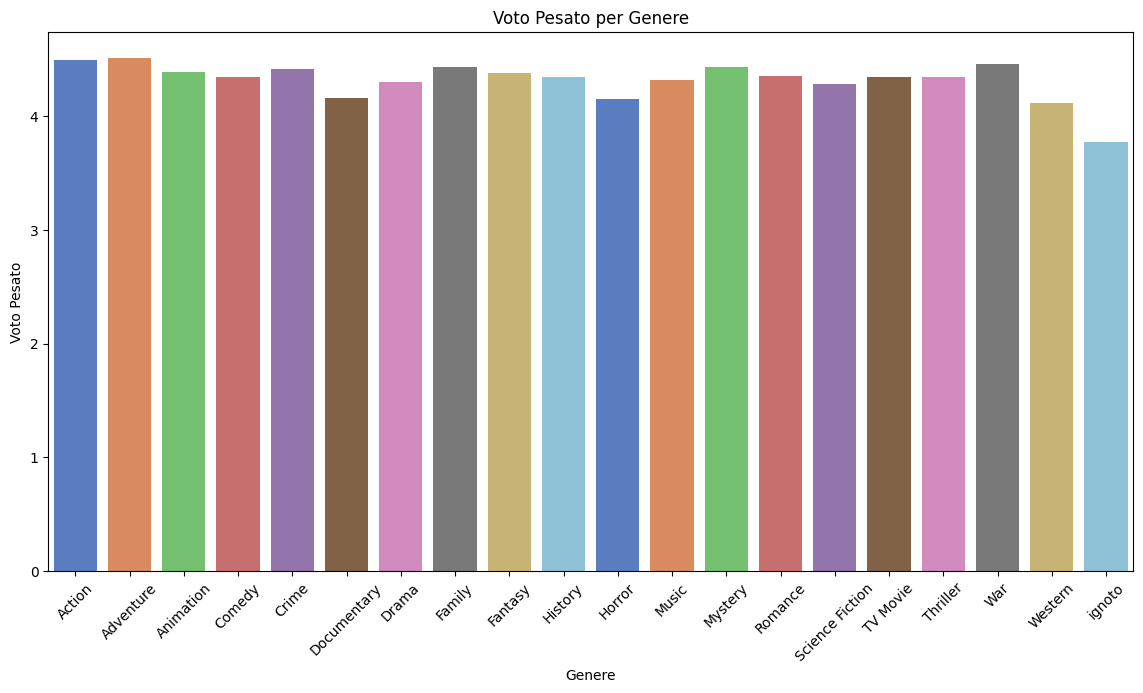

In [556]:
genre_vote_avg = df.groupby('main_genere')['weighted_vote'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_vote_avg, x='main_genere', y='weighted_vote', palette='muted')
plt.title('Voto Pesato per Genere')
plt.xlabel('Genere')
plt.ylabel('Voto Pesato')
plt.xticks(rotation=45)
plt.show()

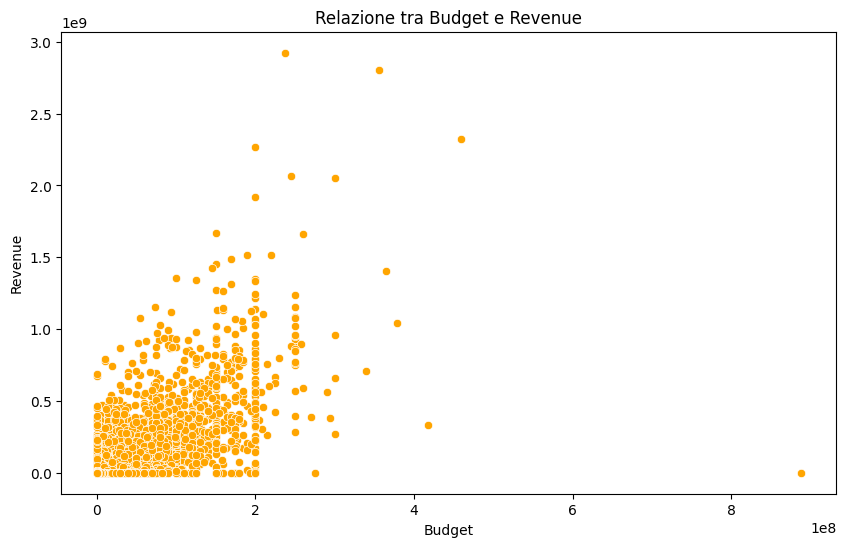

In [557]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', color='orange')
plt.title('Relazione tra Budget e Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [558]:
df.columns

Index(['title', 'vote_count', 'status', 'release_date', 'revenue', 'runtime',
       'adult', 'budget', 'original_language', 'original_title', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords', 'directors', 'writers', 'numVotes',
       'main_genere', 'weighted_vote', 'release_year'],
      dtype='object')

In [566]:
df['production_companies'] = df['production_companies'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['production_countries'] = df['production_countries'].apply(lambda x: x[0] if isinstance(x, list) else x)


C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\4029605865.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_companies, x='production_companies', y='weighted_vote', palette='viridis')


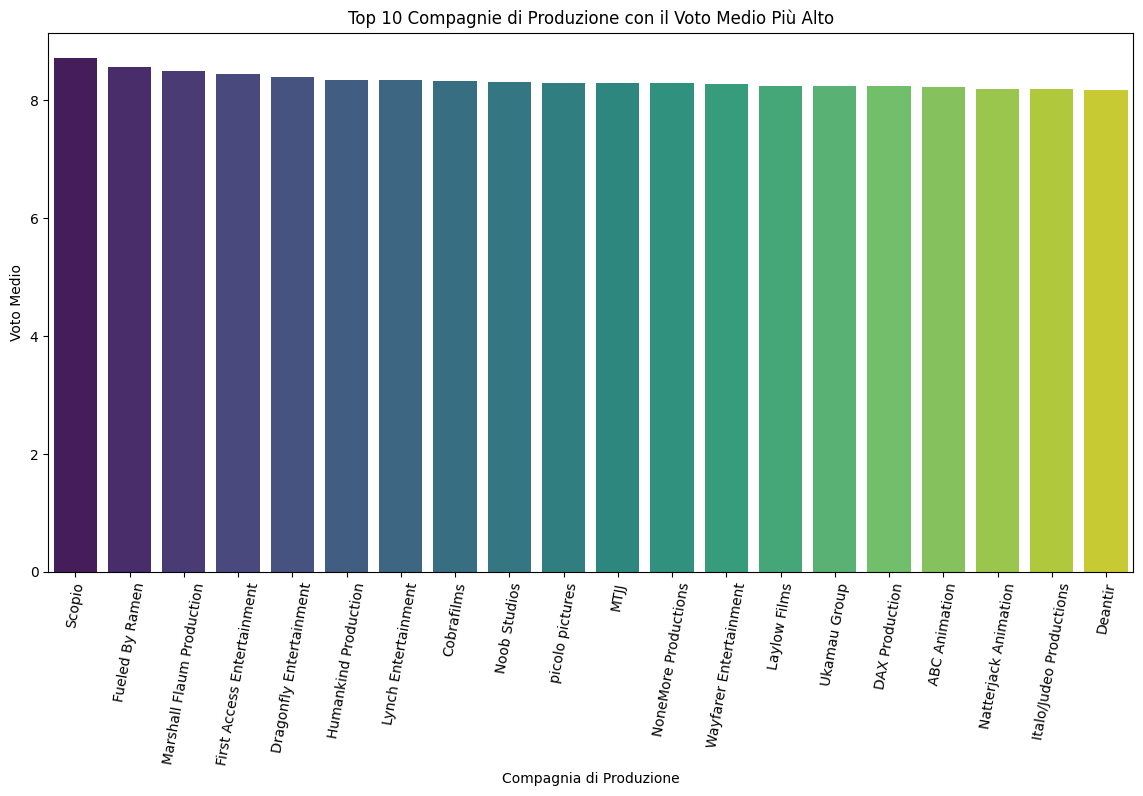

In [584]:
vote_by_company = df.groupby('production_companies')['weighted_vote'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_companies = vote_by_company.nlargest(20, 'weighted_vote')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_companies, x='production_companies', y='weighted_vote', palette='viridis')
plt.title('Top 10 Compagnie di Produzione con il Voto Medio Più Alto')
plt.xlabel('Compagnia di Produzione')
plt.ylabel('Voto Medio')
plt.xticks(rotation=80)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\4164843831.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='production_countries', y='weighted_vote', palette='viridis')


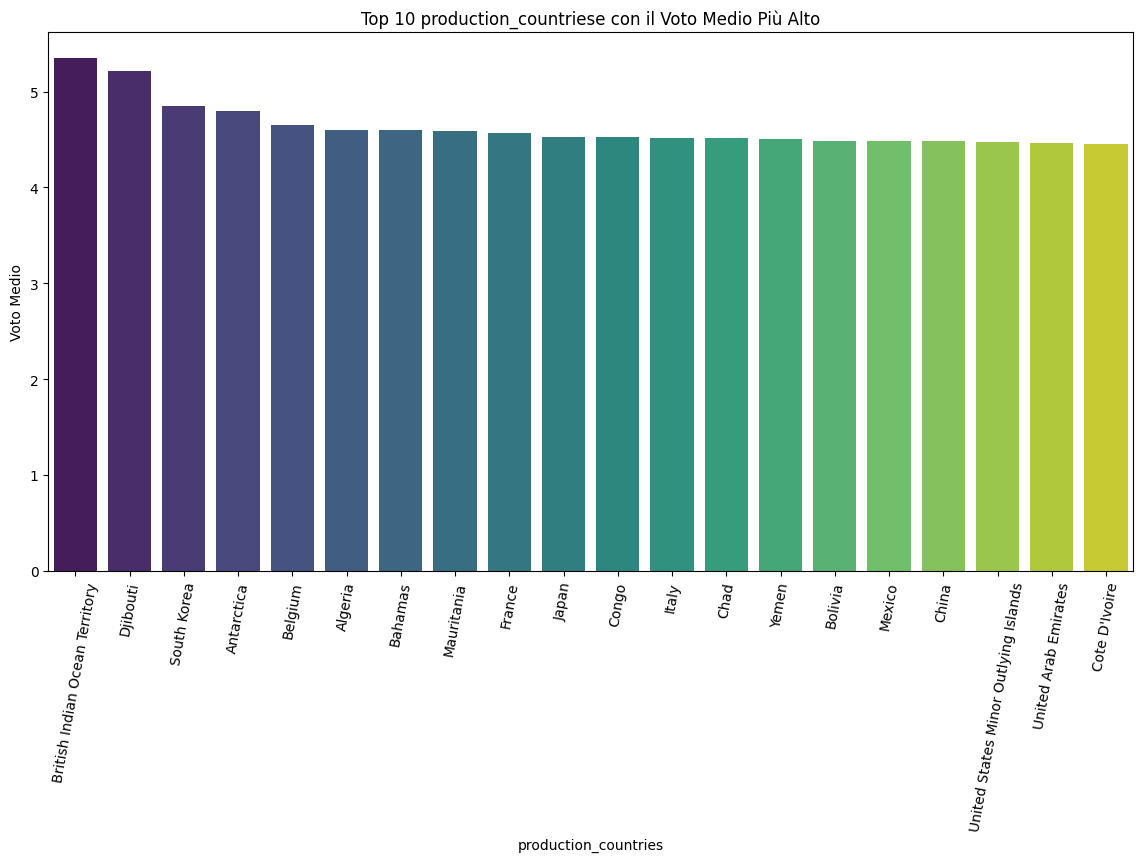

In [585]:
vote_by_country = df.groupby('production_countries')['weighted_vote'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_countries = vote_by_country.nlargest(20, 'weighted_vote')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_countries, x='production_countries', y='weighted_vote', palette='viridis')
plt.title('Top 10 production_countriese con il Voto Medio Più Alto')
plt.xlabel('production_countries')
plt.ylabel('Voto Medio')
plt.xticks(rotation=80)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\3341741753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_companies, x='production_companies', y='budget', palette='viridis')


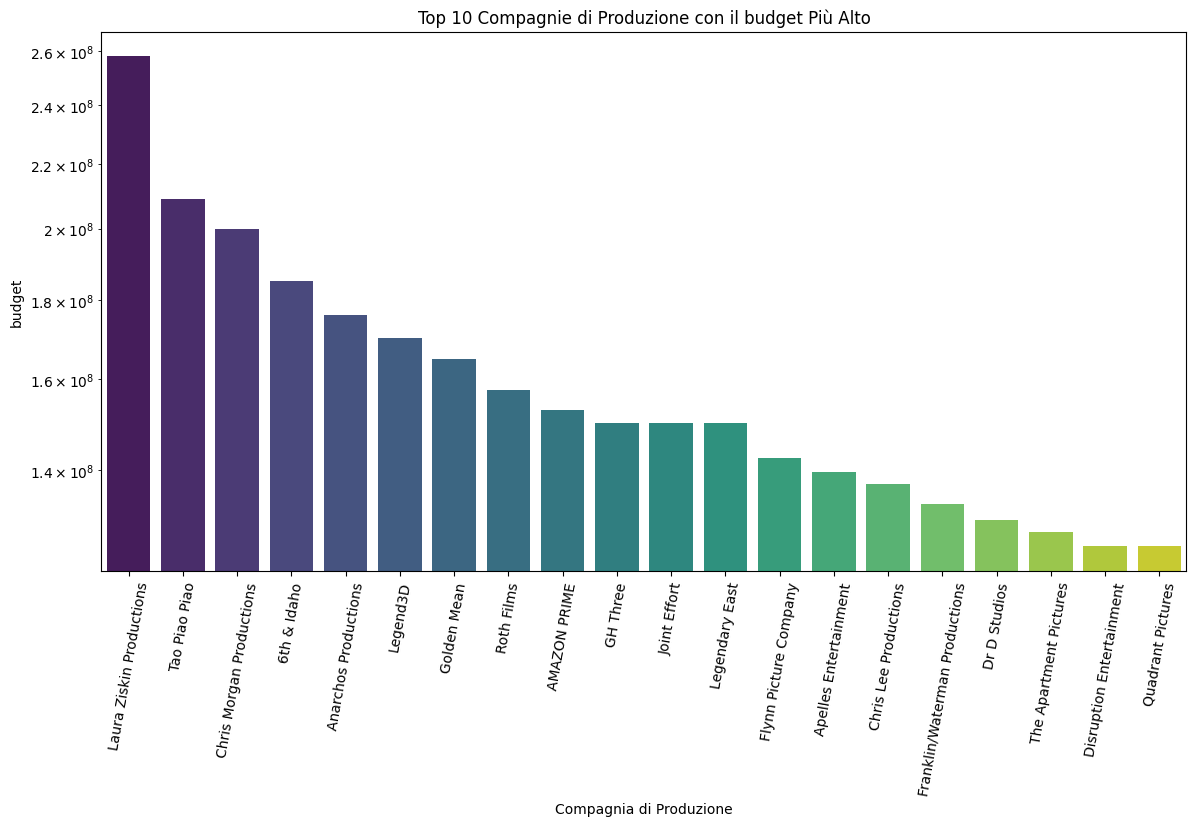

In [586]:
budget_by_company = df.groupby('production_companies')['budget'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_companies = budget_by_company.nlargest(20, 'budget')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_companies, x='production_companies', y='budget', palette='viridis')
plt.yscale('log')
plt.title('Top 10 Compagnie di Produzione con il budget Più Alto')
plt.xlabel('Compagnia di Produzione')
plt.ylabel('budget')
plt.xticks(rotation=80)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\2481188250.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='production_countries', y='budget', palette='viridis')


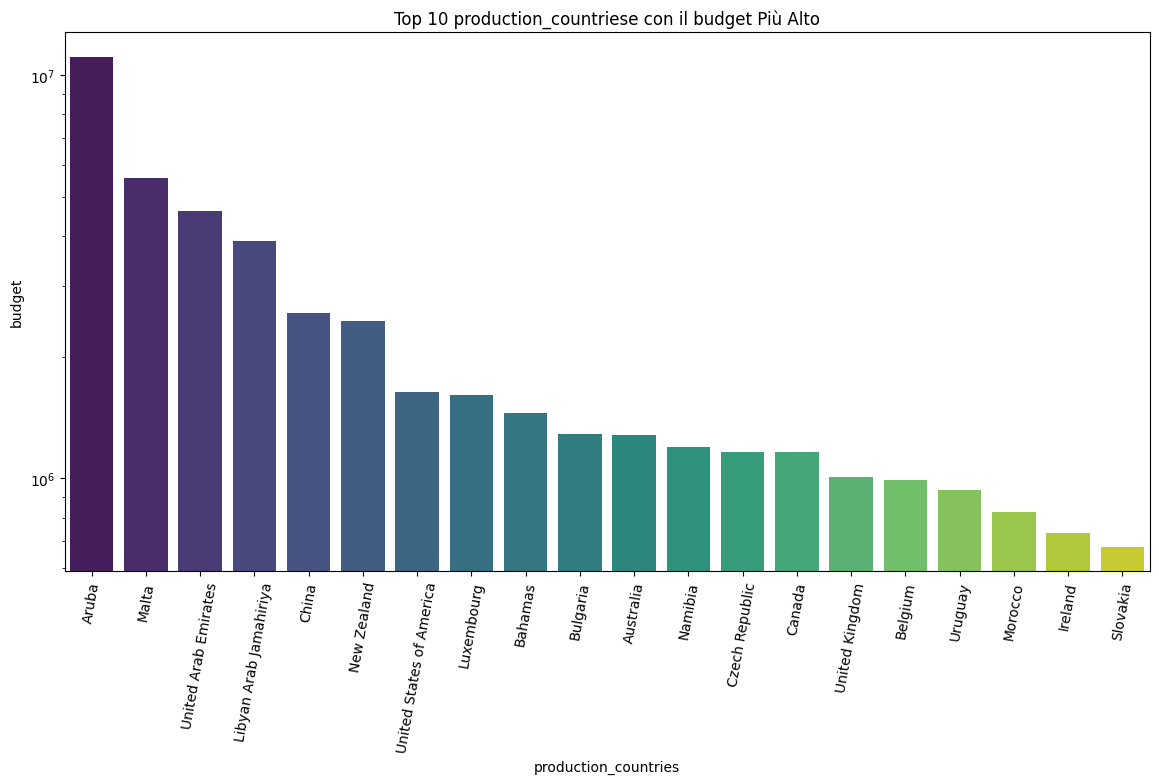

In [587]:
budget_by_country = df.groupby('production_countries')['budget'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_countries = budget_by_country.nlargest(20, 'budget')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_countries, x='production_countries', y='budget', palette='viridis')
plt.yscale('log')
plt.title('Top 10 production_countriese con il budget Più Alto')
plt.xlabel('production_countries')
plt.ylabel('budget')
plt.xticks(rotation=80)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\3723088888.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='production_countries', y='revenue', palette='viridis')


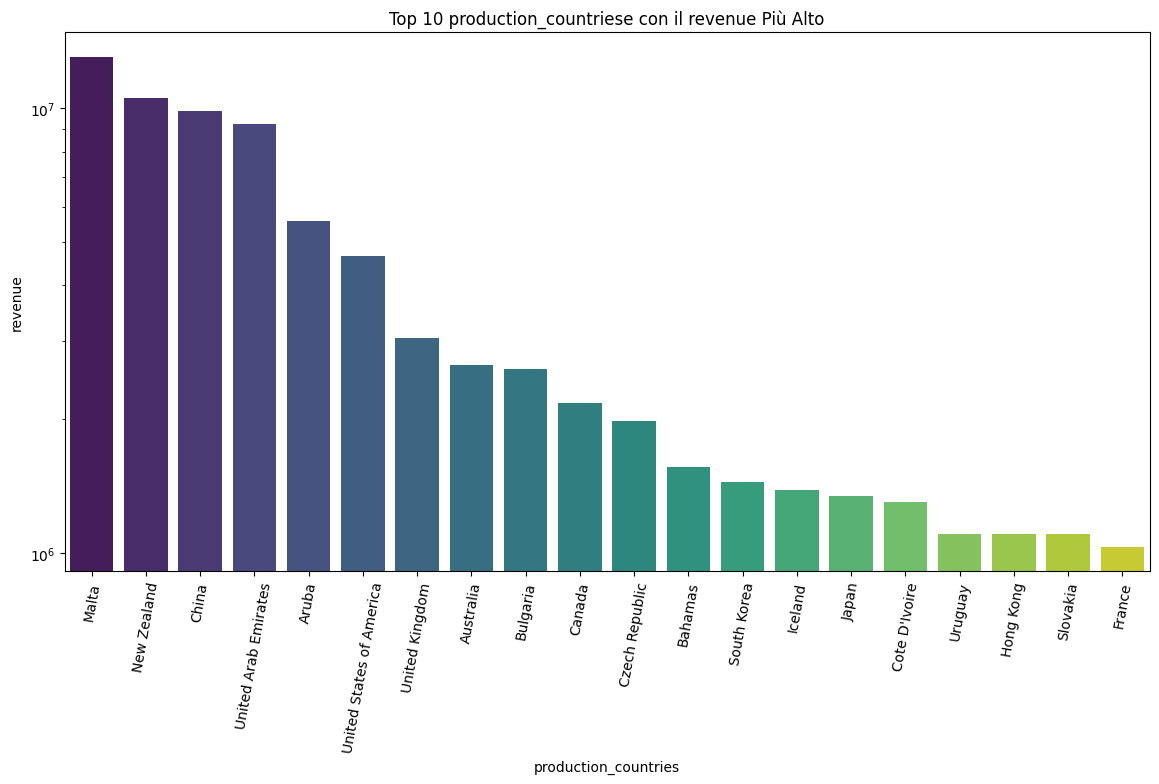

In [588]:
revenue_by_country = df.groupby('production_countries')['revenue'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_countries = revenue_by_country.nlargest(20, 'revenue')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_countries, x='production_countries', y='revenue', palette='viridis')
plt.yscale('log')
plt.title('Top 10 production_countriese con il revenue Più Alto')
plt.xlabel('production_countries')
plt.ylabel('revenue')
plt.xticks(rotation=80)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\127371656.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_companies, x='production_companies', y='revenue', palette='viridis')


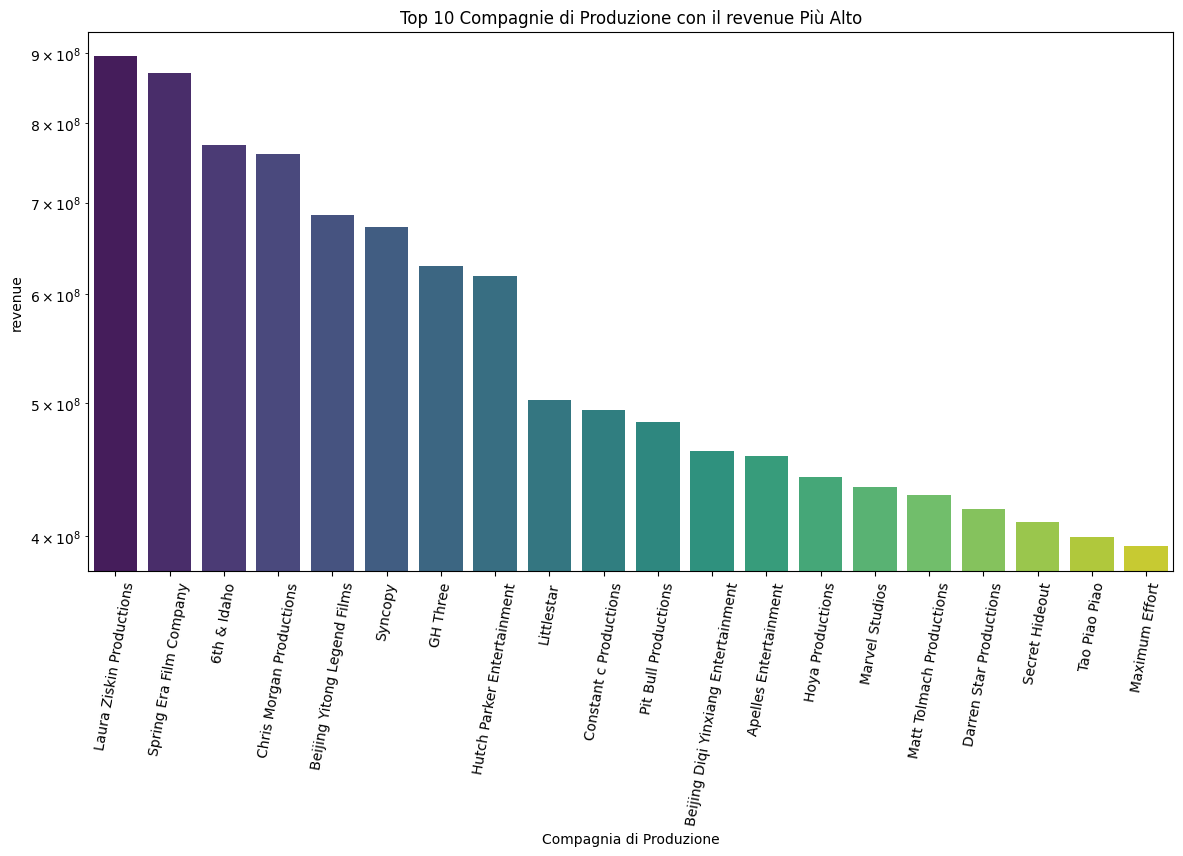

In [589]:
revenue_by_company = df.groupby('production_companies')['revenue'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_companies = revenue_by_company.nlargest(20, 'revenue')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_companies, x='production_companies', y='revenue', palette='viridis')
plt.yscale('log')
plt.title('Top 10 Compagnie di Produzione con il revenue Più Alto')
plt.xlabel('Compagnia di Produzione')
plt.ylabel('revenue')
plt.xticks(rotation=80)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\1050322786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_directors, x='directors', y='revenue', palette='viridis')


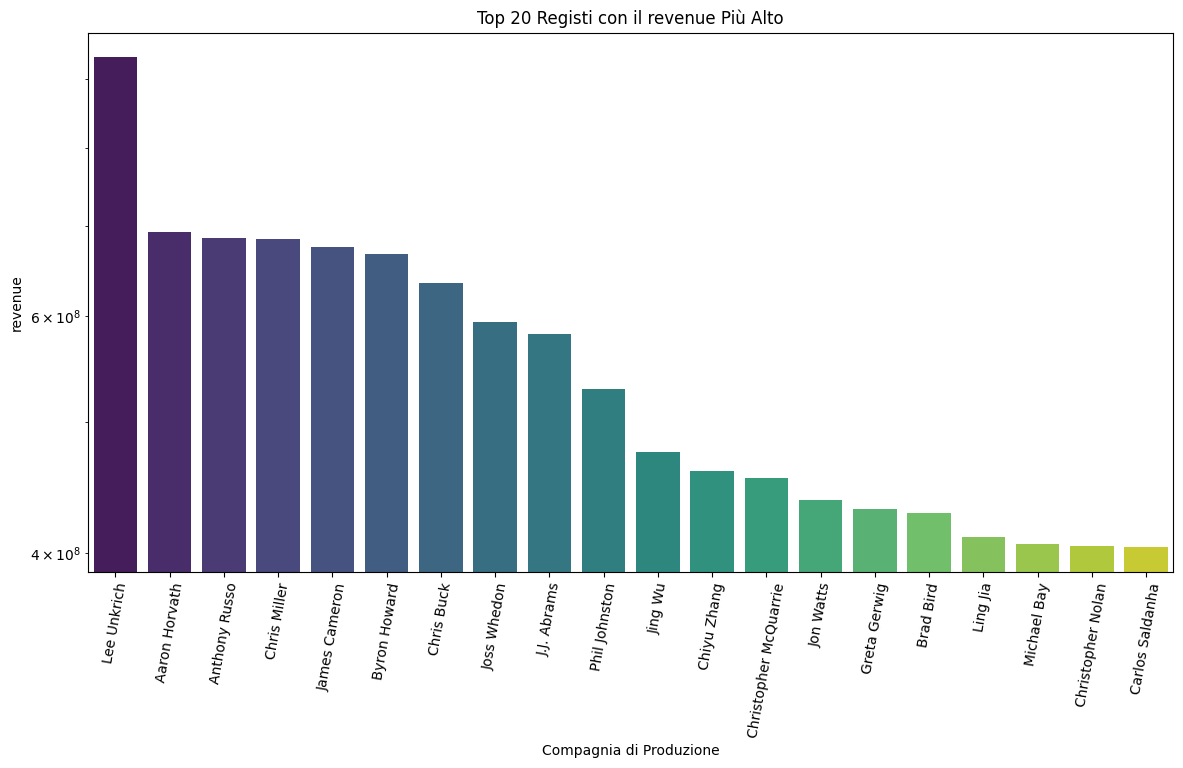

In [ ]:
df['directors'] = df['directors'].str.split(',').str[0]



revenue_by_director = df.groupby('directors')['revenue'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_directors = revenue_by_director.nlargest(20, 'revenue')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_directors, x='directors', y='revenue', palette='viridis')
plt.yscale('log')
plt.title('Top 20 Registi con il revenue Più Alto')
plt.xlabel('Regista')
plt.ylabel('revenue')
plt.xticks(rotation=80)
plt.show()

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\3281334578.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_directors, x='directors', y='budget', palette='viridis')


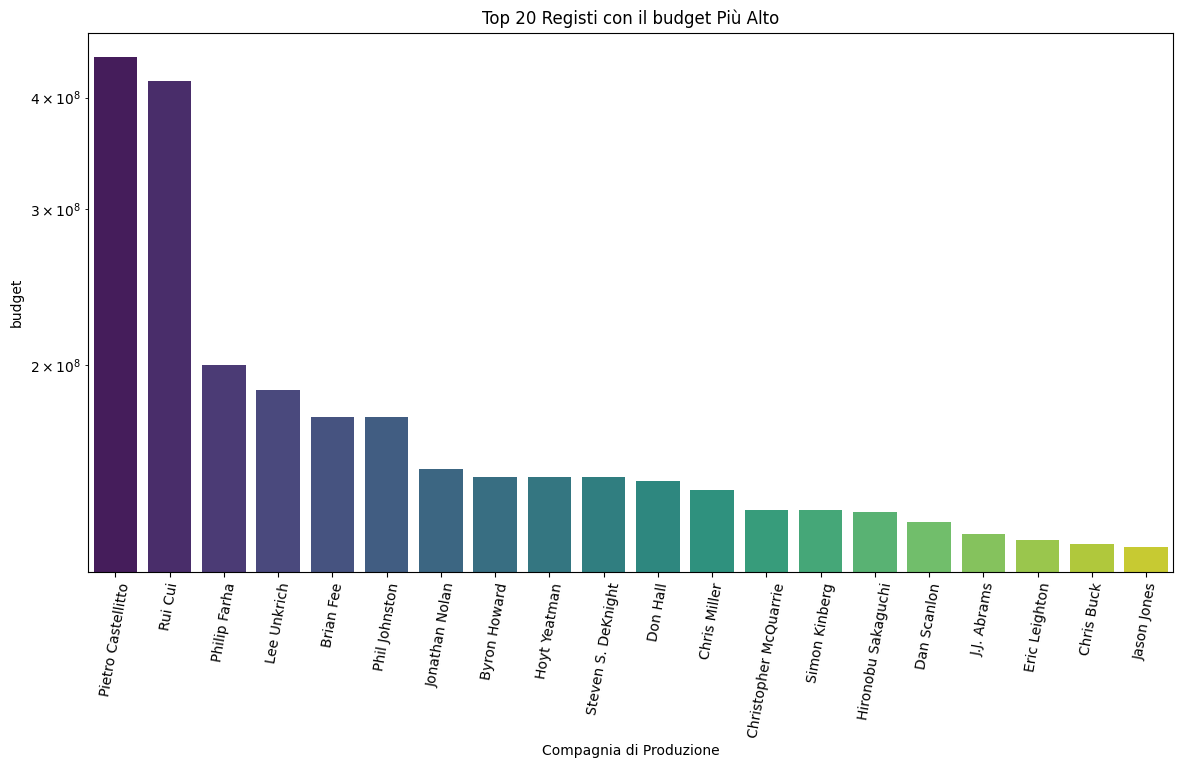

In [ ]:
budget_by_director = df.groupby('directors')['budget'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_directors = budget_by_director.nlargest(20, 'budget')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_directors, x='directors', y='budget', palette='viridis')
plt.yscale('log')
plt.title('Top 20 Registi con il budget Più Alto')
plt.xlabel('Regista')
plt.ylabel('budget')
plt.xticks(rotation=80)
plt.show()

In [594]:
df.columns

Index(['title', 'vote_count', 'status', 'release_date', 'revenue', 'runtime',
       'adult', 'budget', 'original_language', 'original_title', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords', 'directors', 'writers', 'numVotes',
       'main_genere', 'weighted_vote', 'release_year'],
      dtype='object')

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\1486182010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_directors, x='directors', y='weighted_vote', palette='viridis')


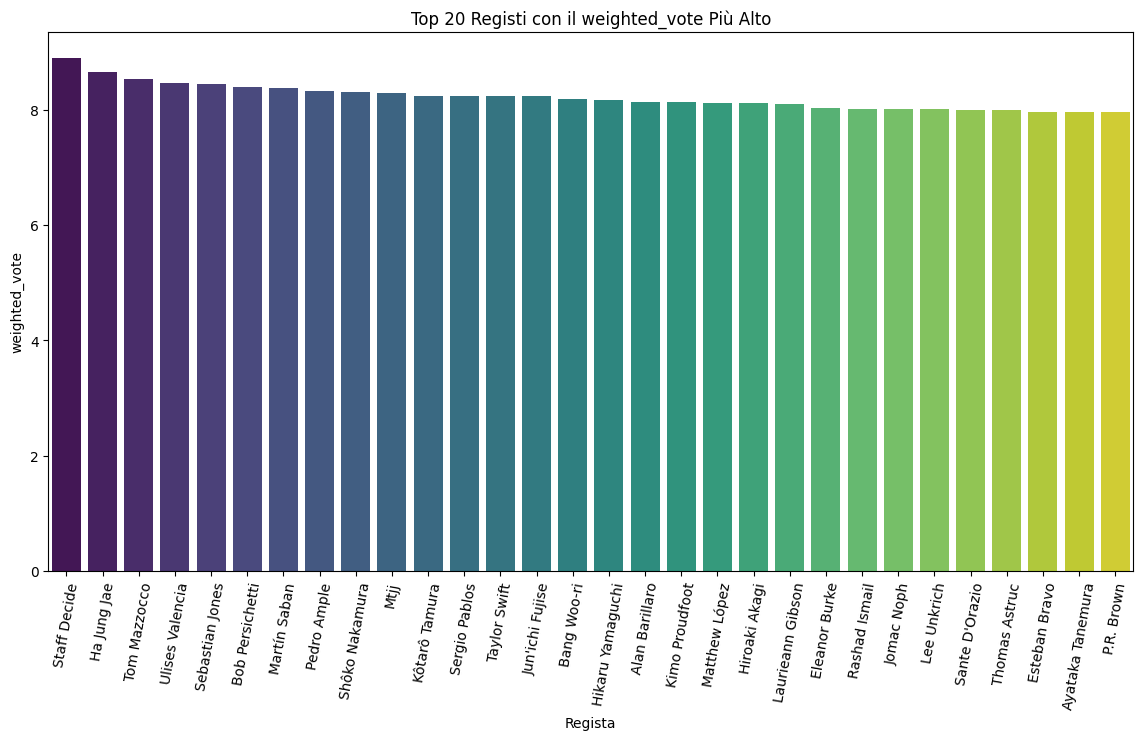

In [597]:
voto_medio_by_director = df.groupby('directors')['weighted_vote'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_directors = voto_medio_by_director.nlargest(30, 'weighted_vote')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_directors, x='directors', y='weighted_vote', palette='viridis')
plt.title('Top 20 Registi con il weighted_vote Più Alto')
plt.xlabel('Regista')
plt.ylabel('weighted_vote')
plt.xticks(rotation=80)
plt.show()

In [ ]:
voto_medio_by_director = df.groupby('directors')['weighted_vote'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_directors = voto_medio_by_director.nlargest(30, 'weighted_vote')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_directors, x='directors', y='weighted_vote', palette='viridis')
plt.title('Top 20 Registi con il weighted_vote Più Alto')
plt.xlabel('Regista')
plt.ylabel('weighted_vote')
plt.xticks(rotation=80)
plt.show()

In [598]:
df.columns

Index(['title', 'vote_count', 'status', 'release_date', 'revenue', 'runtime',
       'adult', 'budget', 'original_language', 'original_title', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords', 'directors', 'writers', 'numVotes',
       'main_genere', 'weighted_vote', 'release_year'],
      dtype='object')

In [600]:
df["production_countries"].unique()

array(['United Kingdom', 'United States of America', 'Canada',
       'New Zealand', 'Australia', 'France', 'South Korea', 'Germany',
       'Japan', 'China', 'Malta', 'Hong Kong', 'Bulgaria', 'Italy',
       'India', 'Brazil', 'Czech Republic', 'Mexico',
       'United Arab Emirates', 'Switzerland', 'Belgium', 'Poland',
       'Spain', 'Sweden', 'Hungary', 'ignoto', 'Ireland', 'South Africa',
       'Denmark', 'Iceland', 'Turkey', 'Colombia', 'Philippines',
       'Austria', 'Finland', 'Israel', 'Argentina', 'Chile', 'Indonesia',
       'Russia', 'Dominican Republic', 'Greece', 'Netherlands',
       'Soviet Union', 'Slovakia', 'Serbia', 'Romania', 'Uruguay',
       'Ghana', 'Thailand', 'Cyprus', 'Malawi', 'Luxembourg', 'Norway',
       'Malaysia', 'Peru', 'Czechoslovakia', 'Singapore', 'Taiwan',
       'Cambodia', 'Jordan', 'Iran', 'Ukraine', 'Morocco', 'Puerto Rico',
       'Estonia', 'Algeria', 'Bosnia and Herzegovina', 'Faeroe Islands',
       'Panama', 'Ecuador', 'Lithuania', 'Bel

In [602]:
countries_of_interest = ["United Kingdom", 'United States of America', 'Canada',
       'New Zealand', 'Australia', 'France','Italy']
filtered_df = df[df['production_countries'].apply(lambda x: any(country in x for country in countries_of_interest))]



C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\655851783.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_companies, x='production_companies', y='revenue', palette='viridis')


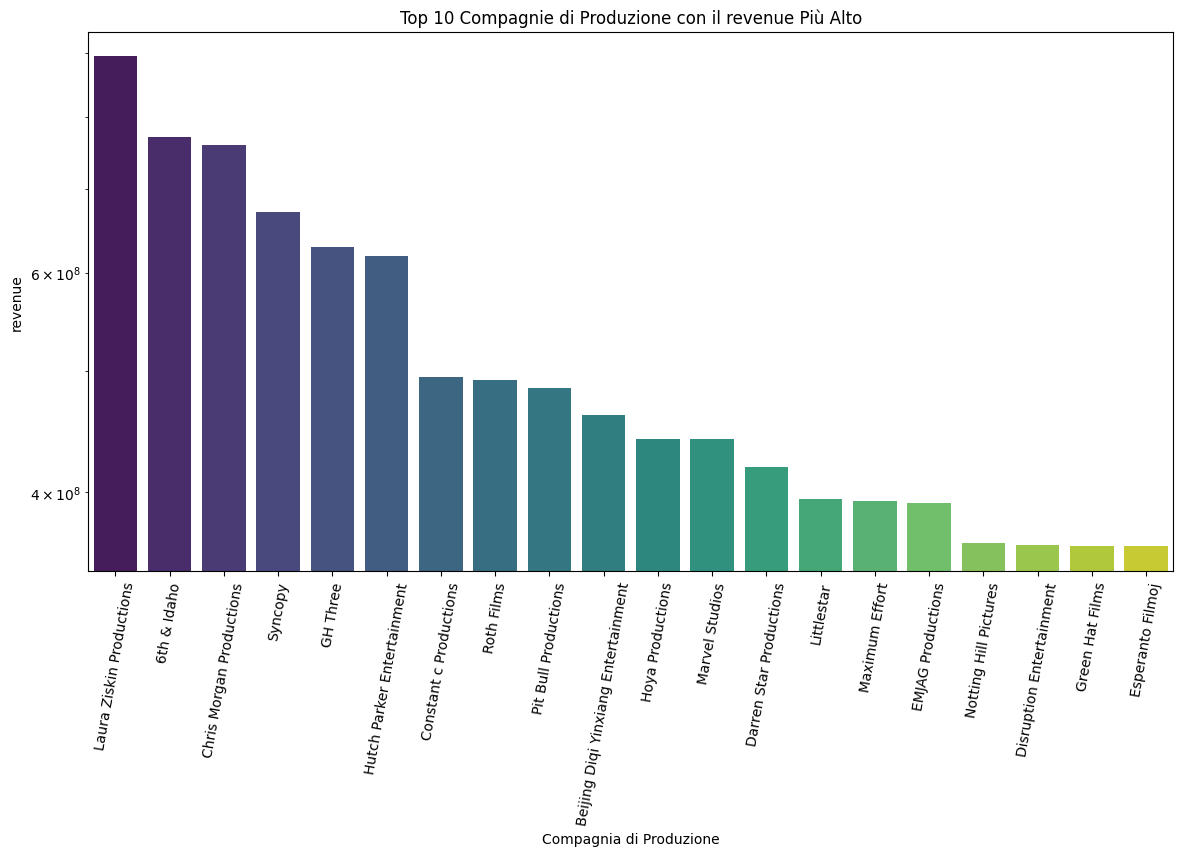

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\655851783.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_directors, x='directors', y='revenue', palette='viridis')


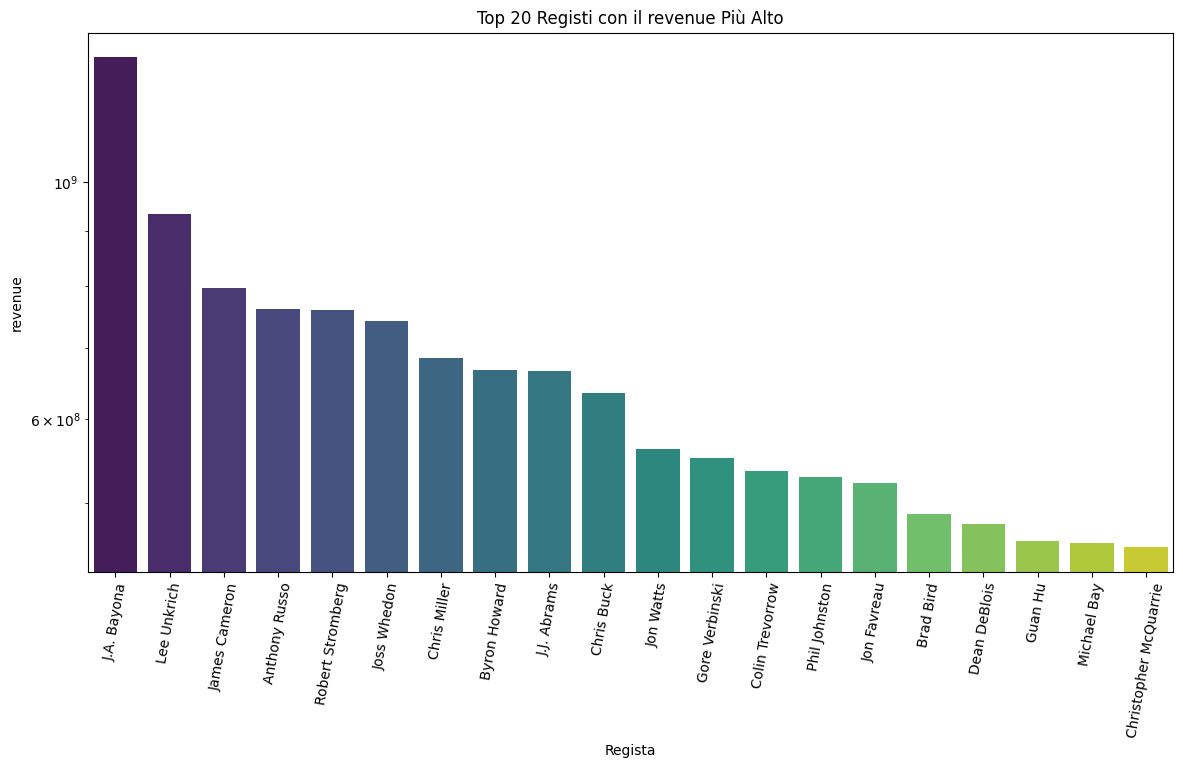

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\655851783.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_directors, x='directors', y='budget', palette='viridis')


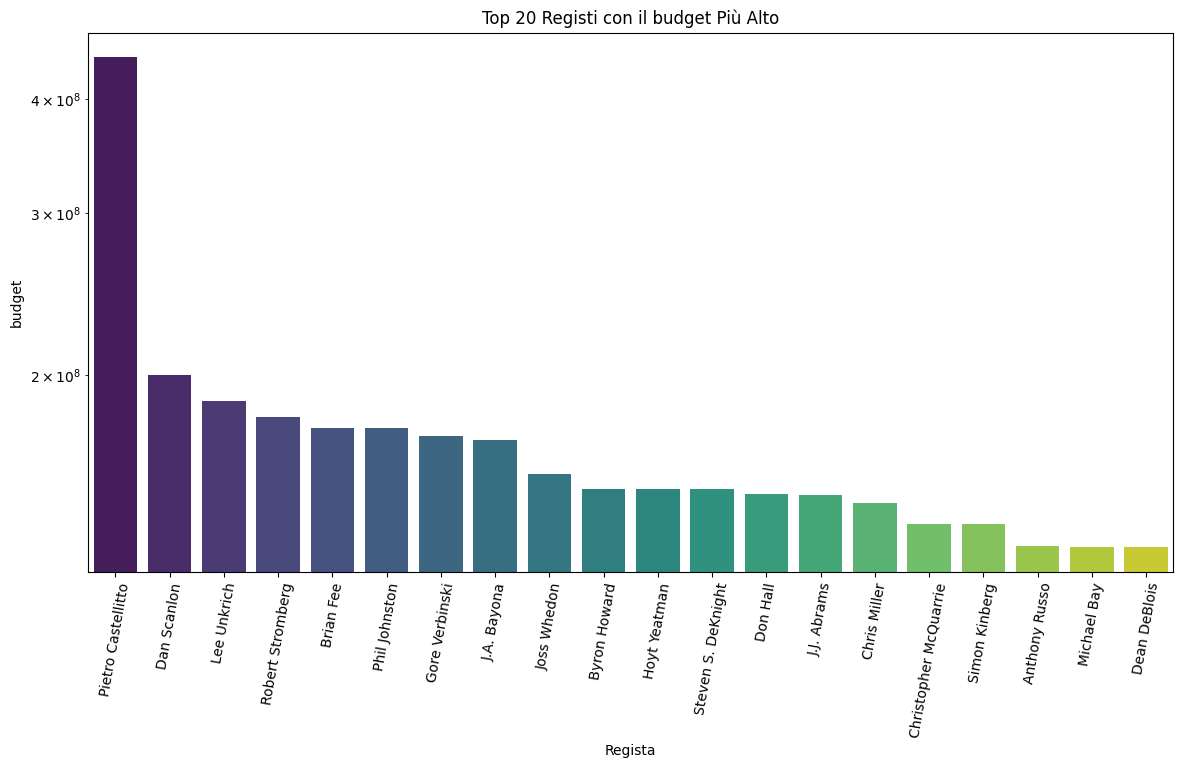

C:\Users\stefano\AppData\Local\Temp\ipykernel_22980\655851783.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_directors, x='directors', y='weighted_vote', palette='viridis')


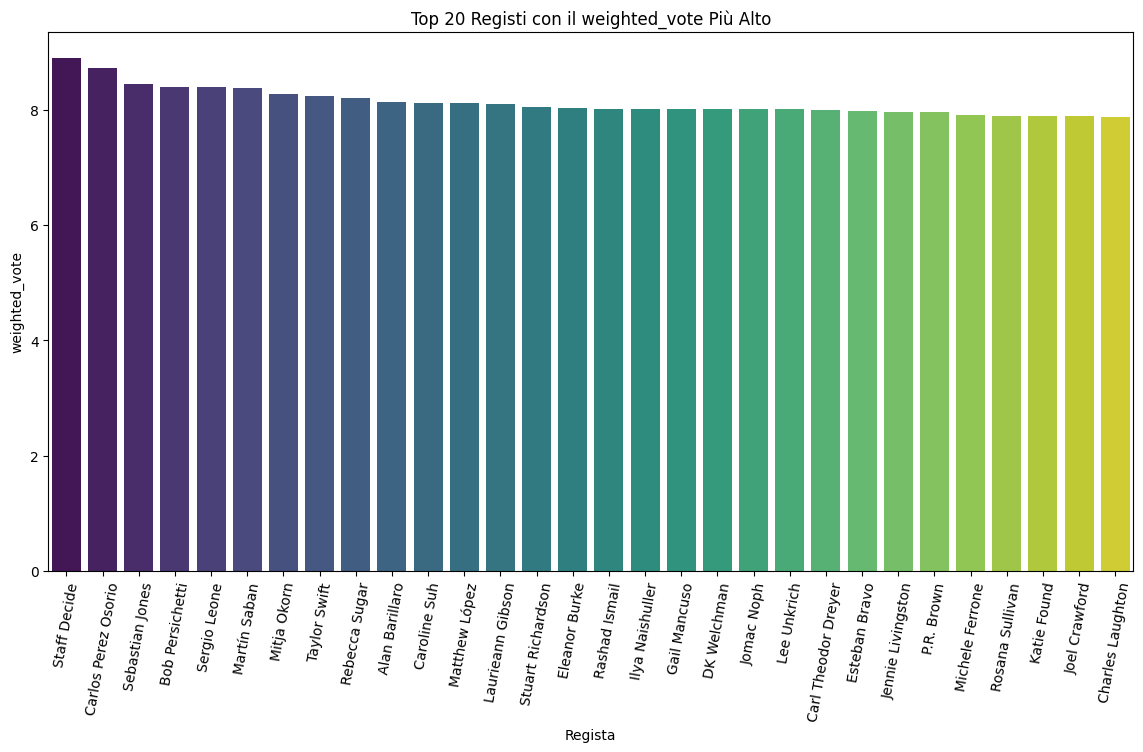

In [603]:
revenue_by_company = filtered_df.groupby('production_companies')['revenue'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_companies = revenue_by_company.nlargest(20, 'revenue')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_companies, x='production_companies', y='revenue', palette='viridis')
plt.yscale('log')
plt.title('Top 10 Compagnie di Produzione con il revenue Più Alto')
plt.xlabel('Compagnia di Produzione')
plt.ylabel('revenue')
plt.xticks(rotation=80)
plt.show()

revenue_by_director = filtered_df.groupby('directors')['revenue'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_directors = revenue_by_director.nlargest(20, 'revenue')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_directors, x='directors', y='revenue', palette='viridis')
plt.yscale('log')
plt.title('Top 20 Registi con il revenue Più Alto')
plt.xlabel('Regista')
plt.ylabel('revenue')
plt.xticks(rotation=80)
plt.show()

budget_by_director = filtered_df.groupby('directors')['budget'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_directors = budget_by_director.nlargest(20, 'budget')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_directors, x='directors', y='budget', palette='viridis')
plt.yscale('log')
plt.title('Top 20 Registi con il budget Più Alto')
plt.xlabel('Regista')
plt.ylabel('budget')
plt.xticks(rotation=80)
plt.show()

voto_medio_by_director = filtered_df.groupby('directors')['weighted_vote'].mean().reset_index()

# Seleziona le prime 10 compagnie con il voto medio più alto
top_10_directors = voto_medio_by_director.nlargest(30, 'weighted_vote')

# Crea un grafico a barre
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_directors, x='directors', y='weighted_vote', palette='viridis')
plt.title('Top 20 Registi con il weighted_vote Più Alto')
plt.xlabel('Regista')
plt.ylabel('weighted_vote')
plt.xticks(rotation=80)
plt.show()

